# **Tsunami Impact Analysis**

## The Problem

Tsunamis are natural hazards that consist of a large, long wave, or series of waves that originate due to a displacement in the ocean.  Such displacements can be man-made or caused by earthquakes, landslides, volanic activity, and other forces.  Tsunamis, unlike waves that are driven by the wind, move between the surface of the ocean and the ocean floor, making them much more powerful and destructive.  When tsunamis approach land, the speed at which it travels and the volume of water it brings to shore can cause damage to human life, property, resources, and infrastructure, especially when there is little to no warning for people to prepare.

Studying the impact of tsunamis, from the way they form to the damages they cause, is important so that the world can try to mitigate the effects as much as possible.  During the span of 1998 to 2017, tsunamis were responsible for 251,770 deaths and cost 280 billion dollars in damages (Imamura).  Since tsunamis are low-frequency, high impact hazards, and there are already difficulties regarding warning and evacuation as well as monitoring and detection, more research into what can be done to limit damages is crucial (Imamura).  Another reason why studying the impact and mitigation of tsunamis is important is due to the expansion of residential living along coastlines.  Any research into failures of past tsunami preparedness efforts will be beneficial to figure out how people can learn to live near the coastline and survive one of these disasters.  Furthermore, areas with predisposed risk factors relating to topography, geophysical conditions, infrastructure, and societal factors should learn the effects of tsunamis on their environment and the ways to limit loss, such as using different building materials, having early warning systems, etc (Imamura).  The idea of pre-reconstruction and discussing how to plan for disasters like tsunamis before they happen is important, as evidenced by the Great East Japan Earthquake and later tsunami; the impact was so devastating that the disaster area was still trying to recover ten years later (Imamura).  Therefore, learning about the effects of tsunamis and the mitigation efforts that work or don't work is useful to helping coastal communities adapt to the threat of tsunamis.


In my analysis, I will be exploring and identifying tsunami trends in terms of geographic location and the amount of damage left in their wake. 


## Research Questions to Explore

* *What are the costs related to tsunami damage?*
* *Are there any similarities in the tsunamis that cause the most amount of damage?*
* *Since Japan and the USA are on opposite sides of the Pacific Ocean/Ring of Fire, are the median wave heights of their tsunamis the same or different?*


## Dataset

In my analysis, I will be using a datasets from [NOAA](www.noaa.gov) that contains tsunami runup data.  
</br>
This dataset "provides information on locations where tsunami waves were observed by eyewitnesses, post-tsunami field surveys, tide gauges, or deep ocean censors.  Inlcudes the maximum wave height, inundation distance, and number of fatalities or dollar damage estimates at the specific location if available" (National).  It spans from 2100 BC to present day in 2021.
* [Dataset](https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/runup-data): Runup Data - This dataset contains recorded information on locations where tsunami effects were seen. </br>
    * National Geophysical Data Center / World Data Service: NCEI/WDS Global Historical Tsunami Database. NOAA National Centers for Environmental Information. doi:10.7289/V5PN93H7

## Data Manipulation, Transformation, and Analysis of Results

### Importing libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

pd.set_option('chained_assignment',None)

### Reading In and Condensing Dataset

In [42]:
df = pd.read_csv("data/tsunami-runups.tsv", sep='\t', low_memory=False)

## Condensing data so that we are only looking at definite tsunami events
## Definite tsunami events are marked by validity of 4
df = df[df['Tsunami Event Validity'] == 4]
df = df.drop(['More Info', 'Search Parameters'], axis=1)

In order to ensure data results are based on proven tsunami occurances, I've eliminated any data from questionable or probable tsunami occurrances.  Therefore, all of the analysis in this notebook will be based on definite recorded tsunamis.

### Investigating Tsunami Damage

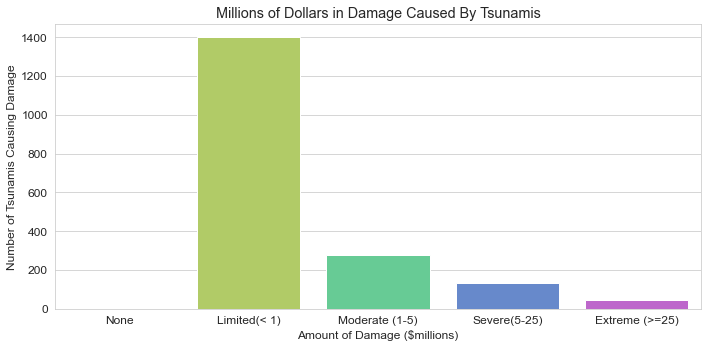

In [43]:
damage_df = df
map_replace = {0:'None',1:'Limited(< 1)', 2:'Moderate (1-5)',3:'Severe(5-25)', 4:'Extreme (>=25)'}
damage_order = ["None", "Limited(< 1)", "Moderate (1-5)", "Severe(5-25)", "Extreme (>=25)"]
damage_df = damage_df[pd.to_numeric(df['Damage Description'],errors='coerce').notna()]
damage_df['Damage Description'] = damage_df['Damage Description'].apply(lambda x: map_replace.get(x))


plt.figure(figsize=(10,5))
ax = sns.countplot(x='Damage Description', data = damage_df, palette = 'hls', order = damage_order)
plt.xlabel("Amount of Damage ($millions)")
plt.ylabel("Number of Tsunamis Causing Damage")
plt.title("Millions of Dollars in Damage Caused By Tsunamis")
plt.tight_layout()
plt.show()

NOAA categorized tsunami damage into the following categories: None, Limited, Moderate, Severe, and Extreme.  These categories represent both numerical data, and descriptions of damage when there was no numerical data available and instead, only descriptions of the damage.  Each category represents the approximate current dollar value of the millions of dollars in damages from the tsunamis.  <br>

Looking at the bar chart above, when tsunamis occur, the majority cause less than one million dollars in damage.  However, on occasion, a powerful tsunami can cause extreme damage, costing those affected over twenty-five million dollars. <br>

Although the number of tsunamis causing extreme damage is limited, the cost is substantial.  Due to this, I will investigate if there are any similarities or trends in the tsunamis that cause the most amount of damage, whether it be geographic location, wave height, or wave indunation.



#### Geographic Location of Tsunamis Causing Extreme Damage

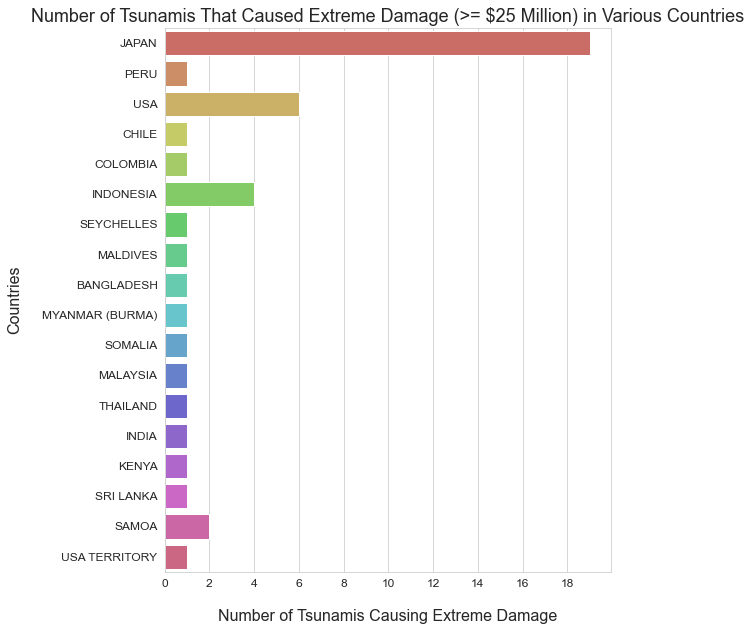

In [44]:
mask = damage_df['Damage Description'] =='Extreme (>=25)'
location = damage_df[mask] #only collecting data where Dam. Desc. category is extreme

tick_spacing = 2
plt.figure(figsize=(8,10))
plt.rcParams['font.size'] = '12'
sns.set_style('whitegrid')
ax = sns.countplot(y='Country', data = location, palette = 'hls')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Number of Tsunamis Causing Extreme Damage", fontsize=16,labelpad=20)
plt.ylabel("Countries", fontsize=16,labelpad=20)
plt.title("Number of Tsunamis That Caused Extreme Damage (>= $25 Million) in Various Countries", fontsize = 18)
plt.show()

Out of all of the countries that sustained extreme damage from tsunamis, it is clear that one country has been hit the most by tsunamis that have caused \\$25 million dollars in damage or more each time they've hit.  The bar chart above shows that Japan experienced 19 extremely destructive tsunamis, way above the second closest neighbor of the USA with 6 extremely destructive tsunamis.  While looking at the visualization, I noticed that the majority of countries who sustained the most damage from tsunamis are located in the same geographic location - Asia and the Pacific Ocean.  <\br>

This makes sense due to the fact that Asia and the USA both surround the Pacific Ocean which is home to the Ring of Fire as well as subduction zones frequently cause earthquakes (one of the major causes of tsunamis).  **ADD SOURCES HERE**

To see if location around the tectonic plates of the Pacifc Ocean makes a difference in the wave height of the tsunamis that hit the shores of both Japan and the USA, I will conduct some statistical analysis. 

#### Statistical Analysis of Tsunami Wave Height Between Japan and USA

In [60]:
test_df = df.dropna(subset = ['Maximum Water Height (m)','Max Inundation Distance (m)'])
names = ['JAPAN', 'USA']
test_df= test_df.loc[test_df['Country'].isin(names)]

usa_df = test_df.loc[test_df['Country'] == 'USA']
usa_wave_height = usa_df['Maximum Water Height (m)'].tolist()

japan_df = test_df.loc[test_df['Country'] == 'JAPAN']
japan_wave_height = japan_df['Maximum Water Height (m)'].tolist()

statistic, p_value = stats.kruskal(usa_wave_height,japan_wave_height)
print("Kruskal-Wallis H-Test to see if population median of Japan and USA Wave Heights are equal:\n")
print("Test Statistic: " + str(statistic) + ", P-Value: " + str(p_value) + ", P-Value < 0.05?: " + str(p_value < .05))
if p_value < 0.05:
    print("Since the pvalue is less than 0.05, we reject the null hypothesis. \n")
else:
    print("Since the pvalue is greater than 0.05, we accept the null hypothesis.\n")


Kruskal-Wallis H-Test to see if population median of Japan and USA Wave Heights are equal:

Test Statistic: 33.70885846476517, P-Value: 6.400854063660096e-09, P-Value < 0.05?: True
Since the pvalue is less than 0.05, we reject the null hypothesis. 



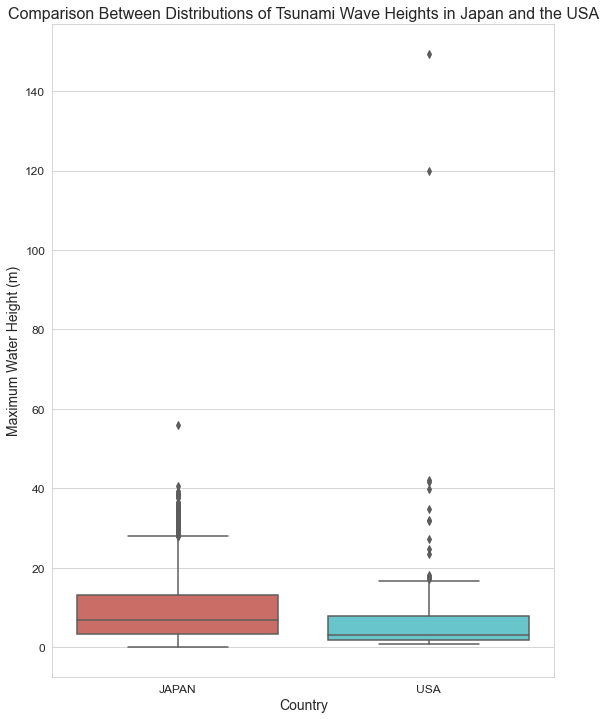

In [59]:
plt.figure(figsize=(9,12))
sns.boxplot(data=test_df,x='Country', y = 'Maximum Water Height (m)', palette='hls')
plt.xlabel("Country",fontsize=14)
plt.ylabel("Maximum Water Height (m)",fontsize=14)
plt.title("Comparison Between Distributions of Tsunami Wave Heights in Japan and the USA",fontsize=16)
plt.show()

Based on the results of the Kruskal test, since the p-value < alpha of 0.05, we reject the null hypothesis that the population medians of the wave heights for each country are the same.  There is sufficient evidence to suggest that the median wave heights of tsunamis hitting Japan and the USA are different.  
</br>Visually, the difference in medians can also be observed from the above box plot.  The range of wave heights is a lot smaller for the USA (with a few outstanding outliers), whereas tsunamis hitting Japan have a wider range of heights, and around 75% of them having heights above the median of USA's tsunami heights.

## Ethical Evaluation of Analysis

## Sources:

 NOAA. “Tsunamis.” National Oceanic and Atmospheric Administration, 2018, www.noaa.gov/education/resource-collections/ocean-coasts/tsunamis.
 </br> </br>
 Imamura, Fumihiko, et al. “Recent Occurrences of Serious Tsunami Damage and the Future Challenges of Tsunami Disaster Risk Reduction.” ScienceDirect, vol. 1, ser. 2019. 2019, www.sciencedirect.com/science/article/pii/S2590061719300092. 
 </br></br>
National Geophysical Data Center / World Data Service: NCEI/WDS Global Historical Tsunami Database. NOAA National Centers for Environmental Information. doi:10.7289/V5PN93H7
</br></br>